# The dataset

## Description
This dataset contains product reviews and metadata from Amazon, including 142.8 million reviews spanning May 1996 - July 2014.
This dataset includes reviews (ratings, text, helpfulness votes), product metadata (descriptions, category information, price, brand, and image features), and links (also viewed/also bought graphs).

http://jmcauley.ucsd.edu/data/amazon


In [1]:
import pandas as pd
import numpy as np

# Reproduce the same result every time if the script is kept consistent otherwise each run will produce different results (for classification)
np.random.seed(500)
    
#[1] Read the data
Corpus = pd.read_json(r"C:\Users\Panos\Desktop\Dissert\Code\Video_Games_5.json", lines=True, encoding='latin-1')

#Print the first 3 rows
Corpus.iloc[:3]

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2HD75EMZR8QLN,0700099867,123,"[8, 12]",Installing the game was a struggle (because of...,1,Pay to unlock content? I don't think so.,1341792000,"07 9, 2012"
1,A3UR8NLLY1ZHCX,0700099867,"Alejandro Henao ""Electronic Junky""","[0, 0]",If you like rally cars get this game you will ...,4,Good rally game,1372550400,"06 30, 2013"
2,A1INA0F5CWW3J4,0700099867,"Amazon Shopper ""Mr.Repsol""","[0, 0]",1st shipment received a book instead of the ga...,1,Wrong key,1403913600,"06 28, 2014"


## Print some valuable counts

In [2]:
import nltk
from nltk.probability import FreqDist
import os
from collections import Counter
import statistics

#Calculate the total number of unique video games
asinString = " ".join(Corpus['asin'])
tokens = nltk.word_tokenize(asinString)
fdist = FreqDist(tokens)
count_asin = len(fdist)

# Calculate the total number of unique reviewers
reviewerIDString = " ".join(Corpus['reviewerID'])
tokens = nltk.word_tokenize(reviewerIDString)
fdist = FreqDist(tokens)
count_reviewerID = len(fdist)

# Set data in variables for the dataframe
totalReviews = int(Corpus.shape[0])
file_size = os.path.getsize(r"C:\Users\Panos\Desktop\Dissert\Code\Video_Games_5.json")
fileSize = int(round((file_size/2**20),2))
avgPerUser = int(round(statistics.mean(Counter(Corpus['reviewerID']).values()),2))
avgPerVG = int(round(statistics.mean(Counter(Corpus['asin']).values()),2))
minReviews = min(Counter(Corpus['asin']).values())
maxReviews = max(Counter(Corpus['asin']).values())

# Create a new dataframe to print a cool table
d1 = {'Description': ["Total reviews",
                      "File size (MB)",
                      "Total number of unique video games",
                      "Total number of unique reviewers",
                      "Average number of reviews per user", 
                      "Average number of reviews per videogame",
                      "Videogame with the minimum reviews",
                      "Videogame with the maximum reviews"],
      'Data': [totalReviews, fileSize, count_asin, count_reviewerID, avgPerUser, avgPerVG, minReviews, maxReviews]}

df1 = pd.DataFrame(data=d1)
df1

,Description,Data
0,Total reviews,231780
1,File size (MB),304
2,Total number of unique video games,10672
3,Total number of unique reviewers,24303
4,Average number of reviews per user,9
5,Average number of reviews per videogame,21
6,Videogame with the minimum reviews,5
7,Videogame with the maximum reviews,802


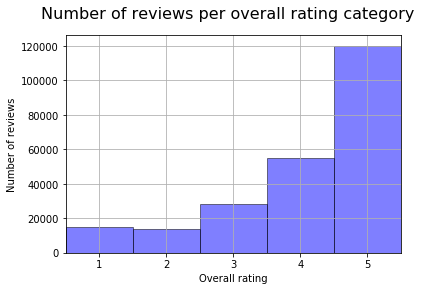

In [6]:
import matplotlib.pyplot as plt

# Helps show the bars aligned
def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xlim(bins[0], bins[-1])

# Create the histogram
bins = range(1,7)
fig = plt.figure()
fig.suptitle('Number of reviews per overall rating category', fontsize=16)
plt.grid()
plt.hist(Corpus['overall'], bins=bins, edgecolor='k', facecolor='blue', alpha=0.5)
bins_labels(bins)
plt.ylabel('Number of reviews')
plt.xlabel('Overall rating')
plt.show()

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
The top 10 words are: 
('good', 'great', 'other', 'new', 'first', 'much', 'many', 'same', 'little', 'few')
Their respective frequencies: 
(118129, 108128, 93372, 80669, 71565, 60635, 58519, 51667, 50219, 49192)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
    count    word
0  118129    good
1  108128   great
2   93372   other
3   80669     new
4   71565   first
5   60635    much
6   58519    many
7   51667    same
8   50219  little
9   49192     few


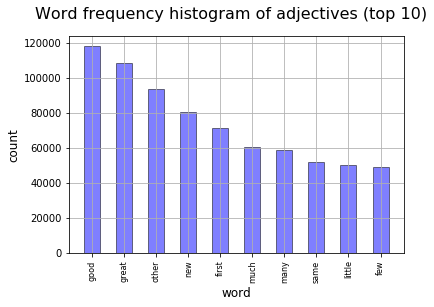

In [4]:
from wordcloud import WordCloud, STOPWORDS
import string
import operator
import sys

# Join all reviews into one string
reviewString = Corpus["reviewText"].str.cat(sep=' ')

# Keep the adjectives using nltk
tokens = nltk.word_tokenize(str(reviewString))
tags = nltk.pos_tag(tokens)
adjectives = [word for word,pos in tags if (pos == 'JJ')]

finalString = " ".join(adjectives)

punct = set(string.punctuation)
reviews_unpunct = ''.join(x for x in finalString if x not in punct)

# Split string into list of strings, again
word_list = reviews_unpunct.split()

# Perform count
counts_all = Counter(word_list)

words, count_values = zip(*counts_all.items())

# Sort both lists by frequency in values (Schwartzian transform) - thanks, http://stackoverflow.com/questions/9543211/sorting-a-list-in-python-using-the-result-from-sorting-another-list
values_sorted, words_sorted = zip(*sorted(zip(count_values, words), key=operator.itemgetter(0), reverse=True))

# Top 10
words_sorted_top = words_sorted[0:10]
values_sorted_top = values_sorted[0:10]

print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("The top {0} words are: \n{1}".format(10, words_sorted_top))
print("Their respective frequencies: \n{0}".format(values_sorted_top))
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
# Pandas DataFrame just for visualisation
df = pd.DataFrame({'count': values_sorted_top, 'word': words_sorted_top})
print("{0}".format(df))
sys.stdout.flush()
        
# Make xticklabels comprehensible by matplotlib
xticklabels = str(list(words_sorted_top)).split()
# Remove the single quotes, commas and enclosing square brackets
xtlabs = [xstr.replace("'","").replace(",","").replace("]","").replace("[","") for xstr in xticklabels]

# Create the histogram
indices = np.arange(len(words_sorted_top))
width = 0.5
fig = plt.figure()
fig.suptitle('Word frequency histogram of adjectives (top {0})'.format(10), fontsize=16)
plt.grid()
plt.xlabel('word', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.bar(indices, values_sorted_top, width, edgecolor='k', facecolor='blue', alpha=0.5)
plt.xticks(indices, xtlabs, rotation='vertical', fontsize=8)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

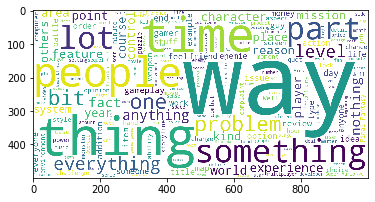

In [5]:
# tags initialized on previous block of code
nouns = [word for word,pos in tags if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS')]

finalString = " ".join(nouns)
        
stop = set(STOPWORDS)
stop.add('fun')
stop.add('play')
stop.add('game')
        
wc = WordCloud(height = 500, width = 1000, background_color = 'white', stopwords = stop).generate(finalString)
plt.imshow(wc,cmap='gray')
plt.show